In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/fbdata.csv"
df = pd.read_csv(file_path)

# Handling missing values
# Fill numeric columns with 0
df.fillna(0, inplace=True)

# Fill categorical columns with 'Unknown'
categorical_cols = df.select_dtypes(include=['object']).columns # identifies all columns in df that have the data type 'object'
df[categorical_cols] = df[categorical_cols].fillna('Unknown') #This line fills any missing values (NaN) in these categorical columns with the string 'Unknown' instead of leaving them blank or NaN

# Save cleaned dataset
df.to_csv("/content/cleanedfbdata.csv", index=False)

print("Data cleaning completed. Missing values handled.")

Data cleaning completed. Missing values handled.


Data Types:
 Name                                                                   object
Users                                                                  object
Facebook_Users%                                                        object
Population                                                             object
Type                                                                   object
Category                                                                int64
Post Month                                                              int64
Post Weekday                                                            int64
Post Hour                                                               int64
Paid                                                                    int64
Lifetime Post Total Reach                                               int64
Lifetime Post Total Impressions                                         int64
Lifetime Engaged Users                             

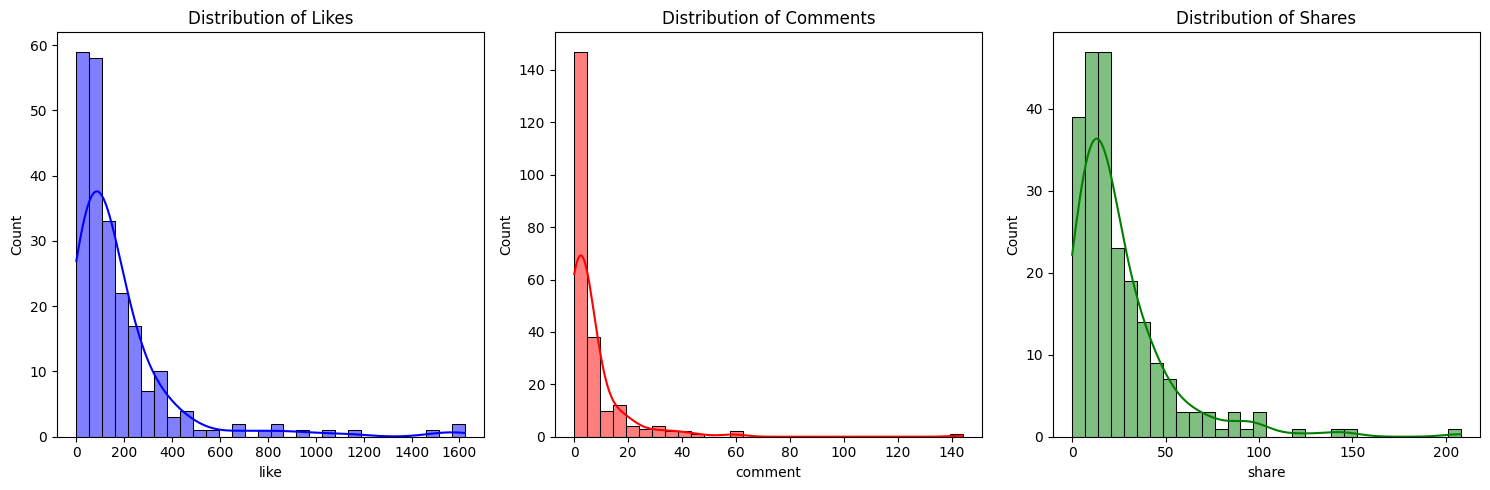

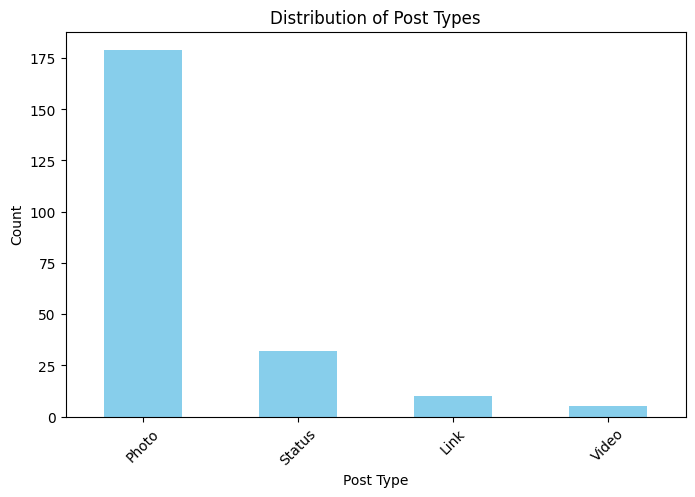

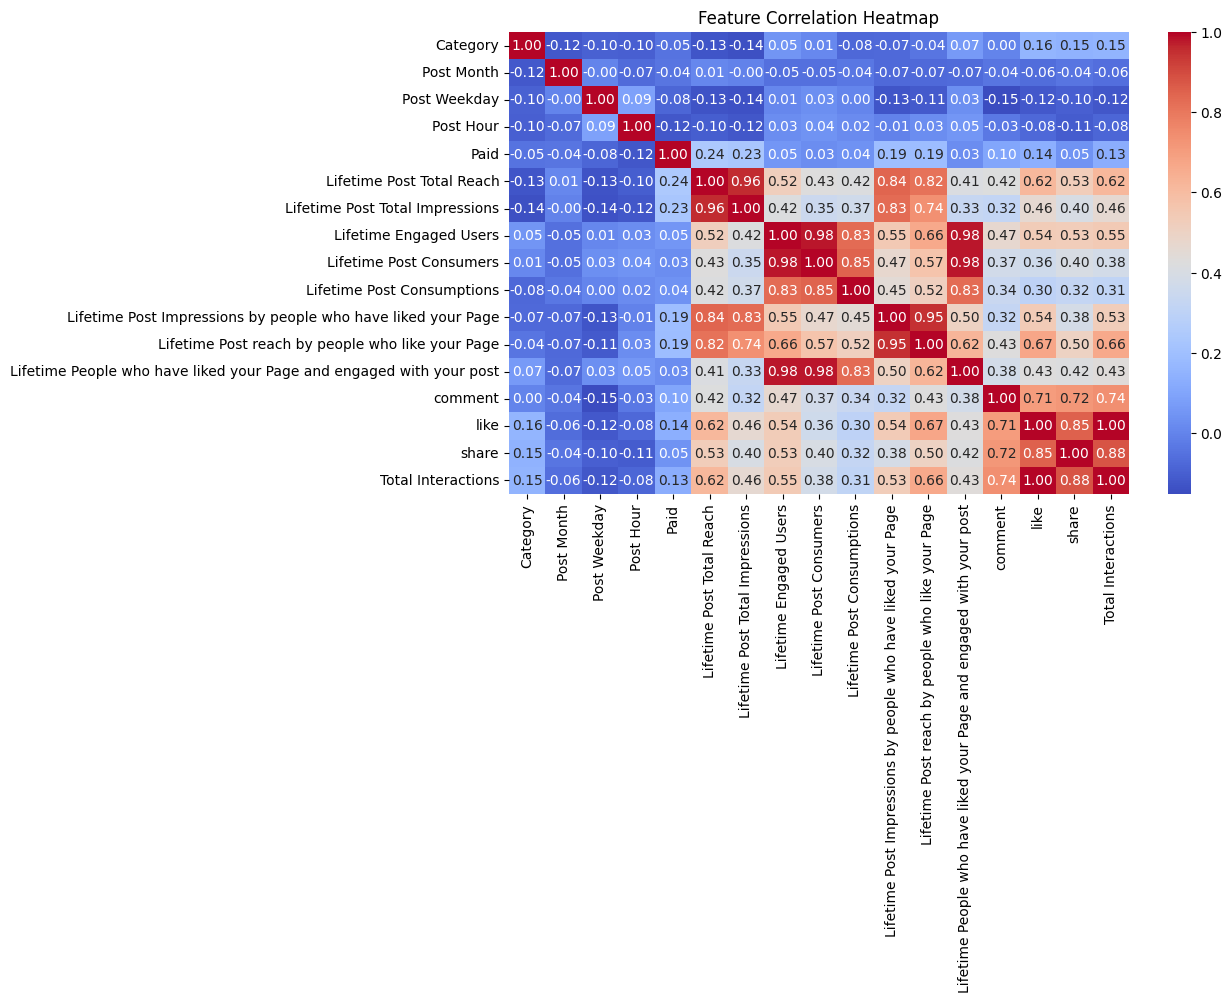

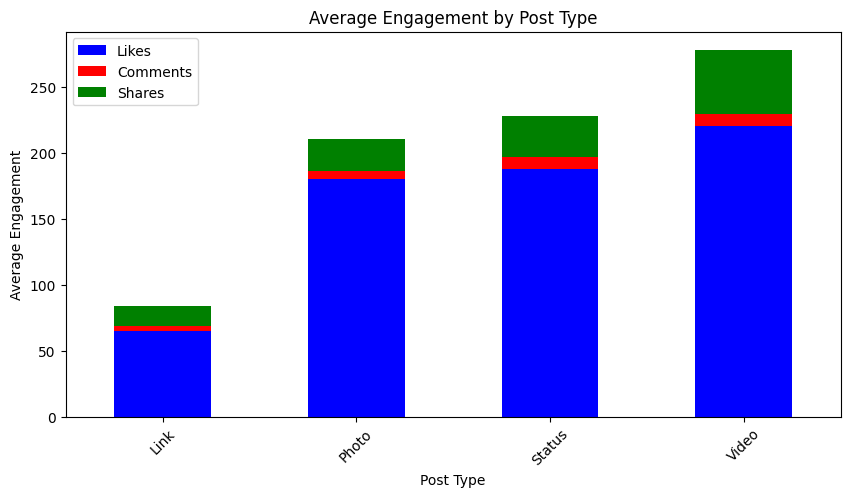

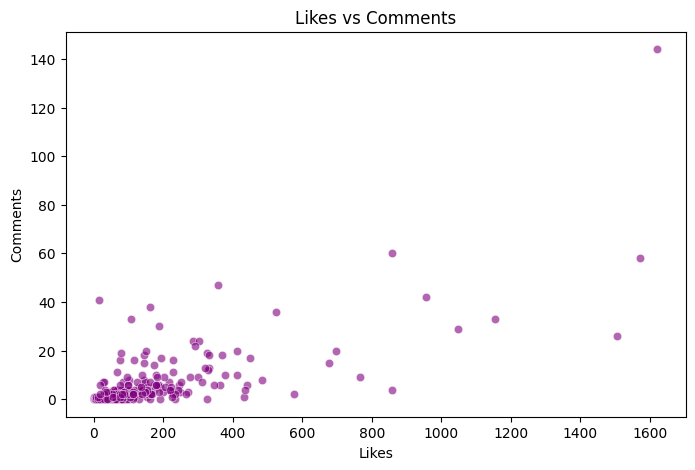

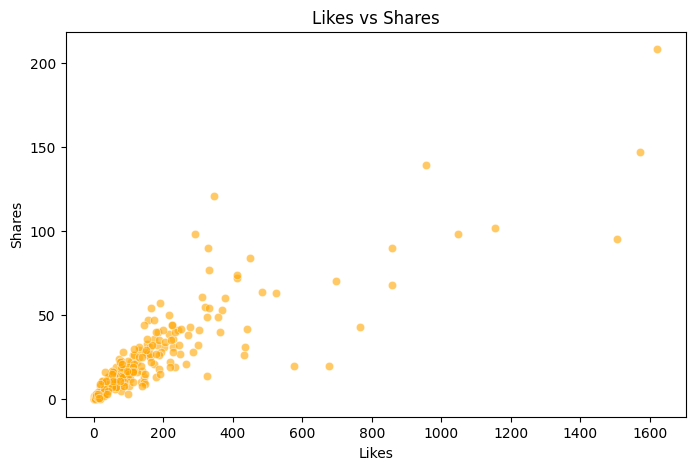

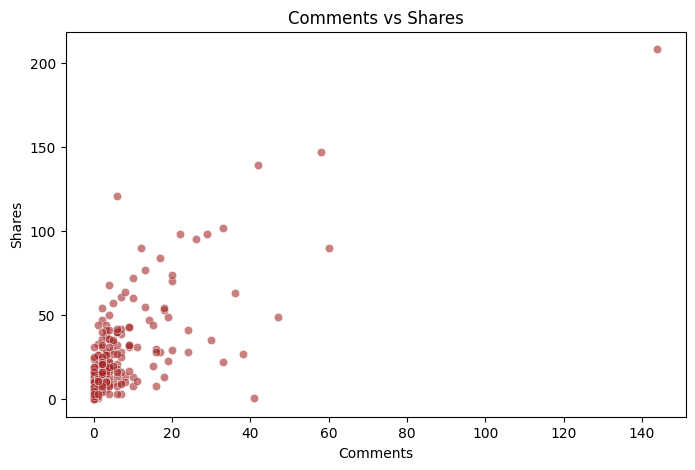


Engagement by Posting Time:
                                          like   comment      share
Post Month Post Weekday Post Hour                                 
7          5            14          95.000000  9.000000  17.000000
8          1            3          859.000000  4.000000  68.000000
                        4           74.500000  1.000000   7.500000
                        10         766.000000  9.000000  43.000000
                        12         133.000000  8.000000  15.500000
...                                       ...       ...        ...
12         6            10         106.000000  3.000000  22.500000
                        11         216.000000  7.000000  39.000000
           7            3           92.333333  0.333333  23.000000
                        9          276.000000  5.500000  22.500000
                        10          30.666667  5.333333   3.333333

[148 rows x 3 columns]
EDA with Univariate and Bivariate Analysis Completed Successfully.


In [ ]:
#Performed exploratory data analysis ( univariate and bivariate form )
'''
Univariate Analysis (Single-column insights)
Distribution of likes, comments, and shares (histogram, boxplot)

Bivariate Analysis (Relationship between two variables)
Likes vs Comments, Likes vs Shares, Comments vs Shares (scatter plot)
Post Type vs Engagement (bar chart of avg. likes, comments, shares per type)
'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #for dv
file_path = "/content/cleanedfbdata.csv" #specify the path
df = pd.read_csv(file_path) #reading csv
df_numeric = df.select_dtypes(include=['number']) #include numeric columns

# Exploratory Data Analysis (EDA)
# 1. Check Data Types and Summary Statistics
print("Data Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

# Univariate Analysis
# 2. Distribution of Likes, Comments, and Shares using multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) #Creates a figure with 3 subplots arranged in one row and three columns

#figsize=(15, 5) sets the overall figure size to 15 inches wide and 5 inches tall
sns.histplot(df['like'], bins=30, kde=True, ax=axes[0], color='blue')
#histogram for likes,kde(kernel distribution estimate for density curves),color will be blue
#bins=30 means that equal 30 distributions(bars) would be made out

axes[0].set_title("Distribution of Likes") #set the title

sns.histplot(df['comment'], bins=30, kde=True, ax=axes[1], color='red')
axes[1].set_title("Distribution of Comments")
sns.histplot(df['share'], bins=30, kde=True, ax=axes[2], color='green')
axes[2].set_title("Distribution of Shares")
plt.tight_layout()
plt.show()

# 3. Post Type Distribution
plt.figure(figsize=(8, 5))
df['Type'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Post Types")
plt.xlabel("Post Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Bivariate Analysis
# 4. Correlation Heatmap, generates a heatmap to visualize the correlation between different numerical features
plt.figure(figsize=(10, 6)) #specify the size
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')

'''
df_numeric.corr()
Calculates the correlation between numerical columns in the dataset.
The result is a correlation matrix, where:

Values range from -1 to 1.
1.0 → Perfect positive correlation (if one increases, the other also increases).
-1.0 → Perfect negative correlation (if one increases, the other decreases).
0.0 → No correlation.

annot=  Displays the actual correlation values inside the heatmap cells
cmap='coolwarm'  ,Uses a color gradient where:
Blue = Negative correlation.
White = Neutral (0 correlation).
Red  = Positive correlation.

fmt=.2F means that the correlation values are displayed with two decimal places.
'''

plt.title("Feature Correlation Heatmap")
plt.show()

# 5. Engagement by Post Type
engagement_means = df.groupby('Type')[['like', 'comment', 'share']].mean()
engagement_means.plot(kind='bar', stacked=True, figsize=(10, 5), color=['blue', 'red', 'green'])
plt.title("Average Engagement by Post Type")
plt.xlabel("Post Type")
plt.ylabel("Average Engagement")
plt.legend(['Likes', 'Comments', 'Shares'])
plt.xticks(rotation=45)
plt.show()

# 6. Relationship Between Likes, Comments, and Shares
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['like'], y=df['comment'], color='purple', alpha=0.6)
plt.title("Likes vs Comments")
plt.xlabel("Likes")
plt.ylabel("Comments")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['like'], y=df['share'], color='orange', alpha=0.6)
plt.title("Likes vs Shares")
plt.xlabel("Likes")
plt.ylabel("Shares")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['comment'], y=df['share'], color='brown', alpha=0.6)
plt.title("Comments vs Shares")
plt.xlabel("Comments")
plt.ylabel("Shares")
plt.show()

# 7. Time-based Analysis (if time-related columns exist)
if 'Post Month' in df.columns and 'Post Weekday' in df.columns and 'Post Hour' in df.columns:
    time_engagement = df.groupby(['Post Month', 'Post Weekday', 'Post Hour'])[['like', 'comment', 'share']].mean()
    print("\nEngagement by Posting Time:\n", time_engagement)

print("EDA with Univariate and Bivariate Analysis Completed Successfully.")

Mean Squared Error: 148.05116284484527
R-squared Score: 0.7708186333671126


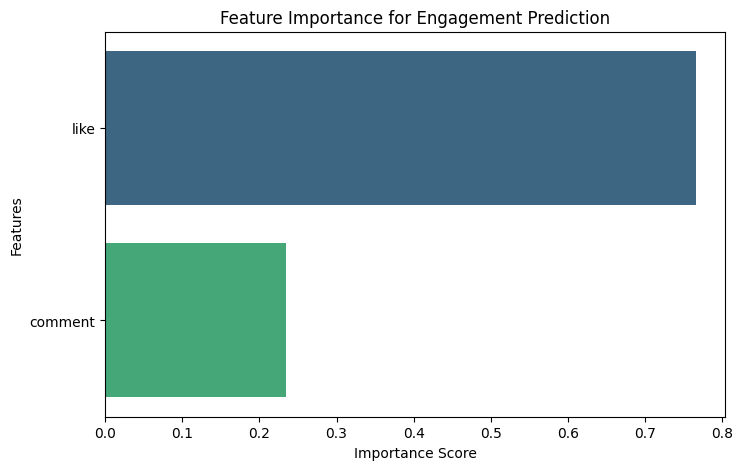

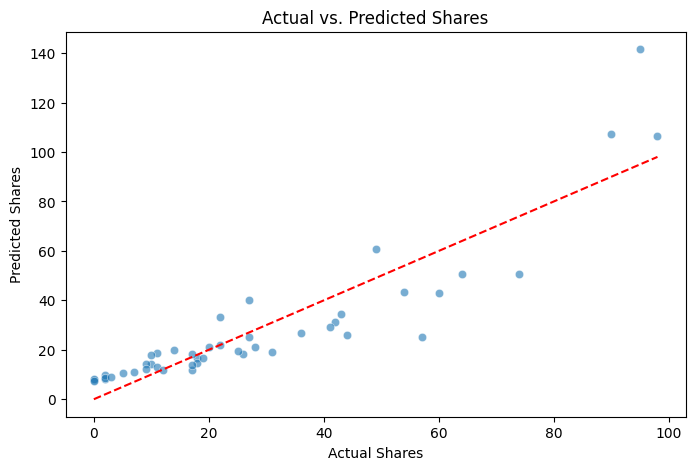

In [ ]:
#Engagement Prediction
#Use Linear Regression to predict the number of shares based on likes/comments.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the cleaned dataset
data = pd.read_csv('/content/cleanedfbdata.csv')

# Selecting relevant features for engagement prediction
features = ['like', 'comment']
target = 'share'

# Splitting the dataset into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

# Feature Importance using Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_

# Plot feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], hue=importance_df['Feature'], palette='viridis', legend=False)
plt.title('Feature Importance for Engagement Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Plot Actual vs Predicted Shares
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual Shares')
plt.ylabel('Predicted Shares')
plt.title('Actual vs. Predicted Shares')
plt.show()


<Figure size 1200x600 with 0 Axes>

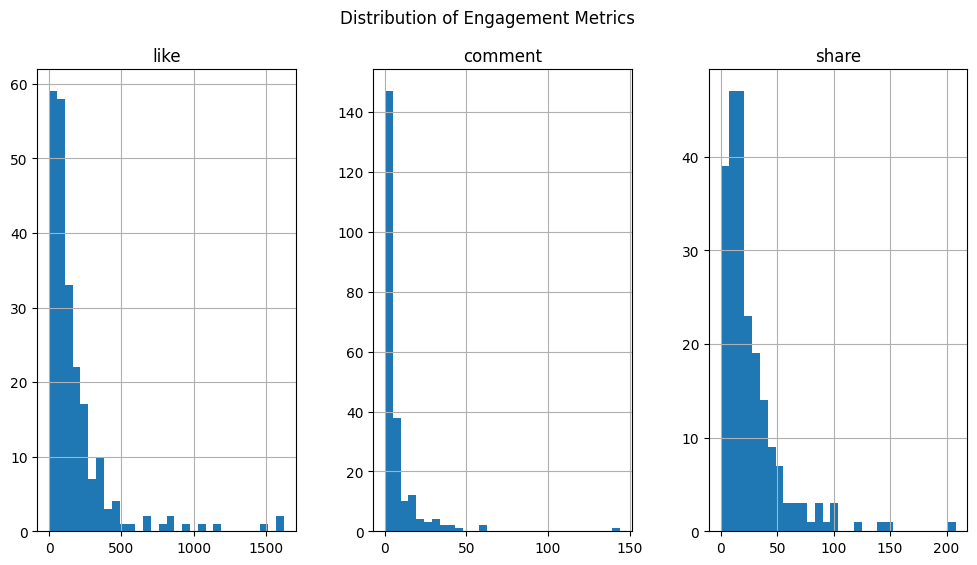

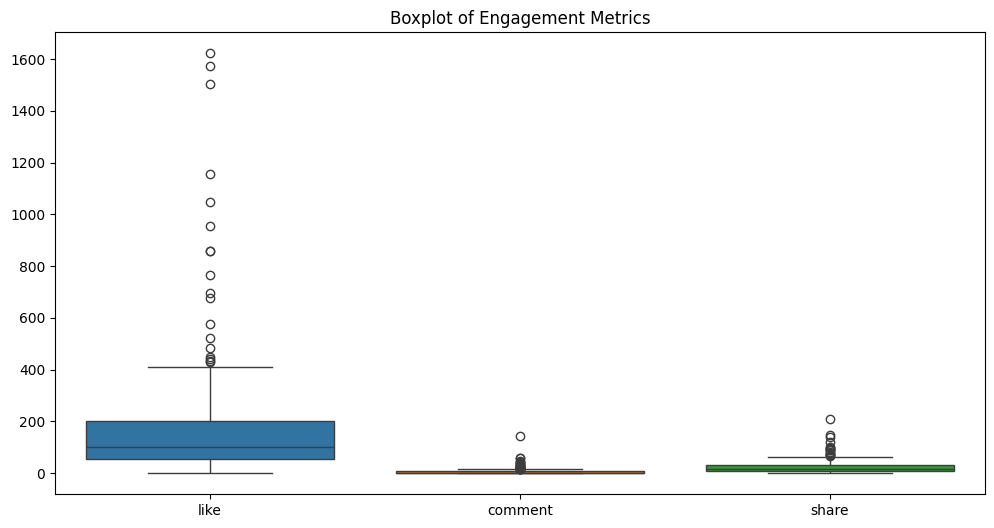

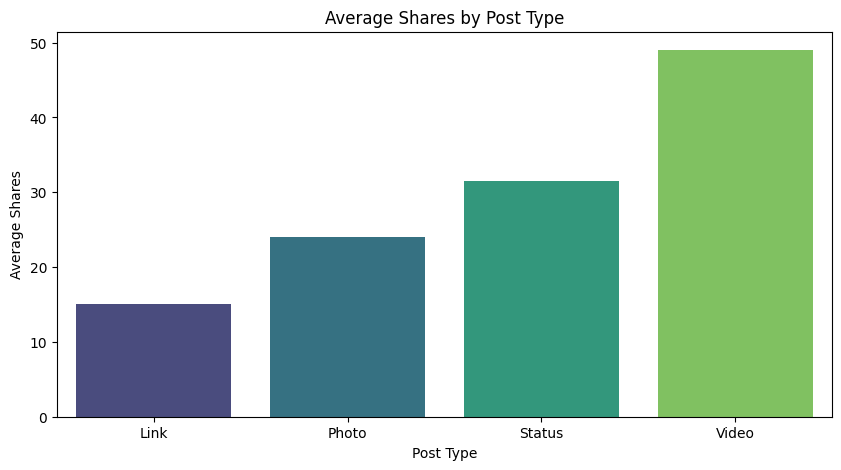

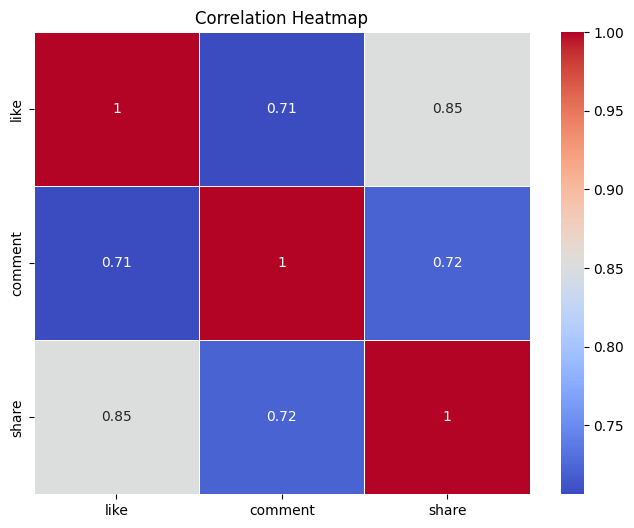

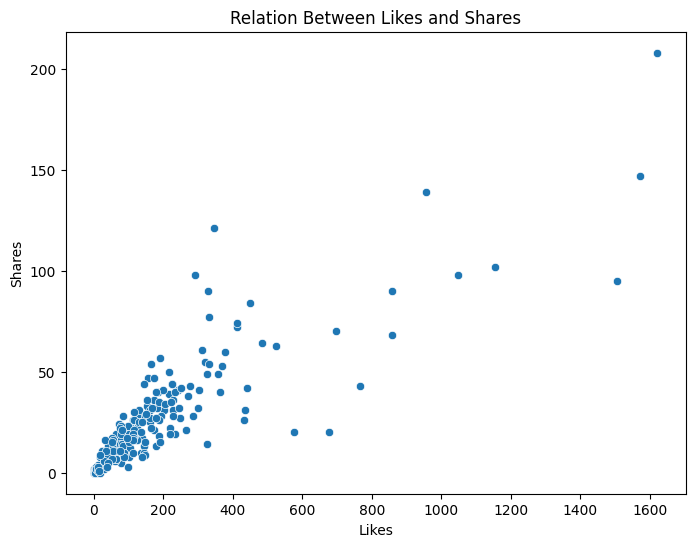

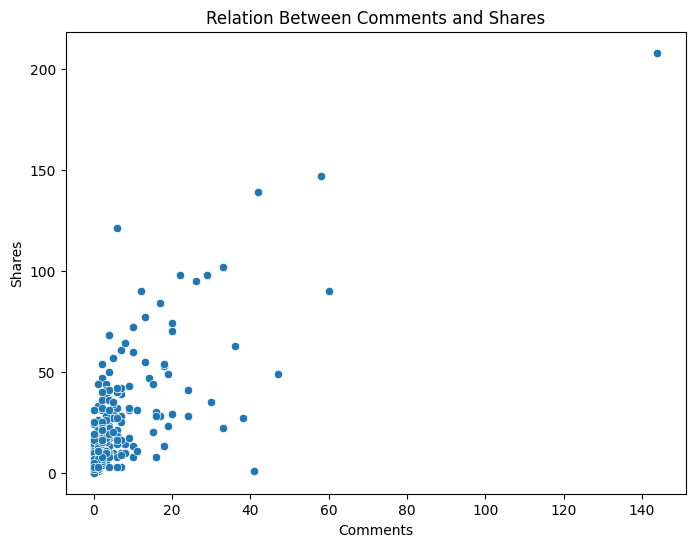

In [ ]:
#Data Visualisation using bar chart,boxplot and heatmaps


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv("/content/cleanedfbdata.csv")

# Histograms & Boxplots
plt.figure(figsize=(12, 6))
df[['like', 'comment', 'share']].hist(bins=30, figsize=(12, 6), layout=(1, 3))
plt.suptitle('Distribution of Engagement Metrics')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['like', 'comment', 'share']])
plt.title('Boxplot of Engagement Metrics')
plt.show()

# Bar Chart - Most engaging post types
plt.figure(figsize=(10, 5))
sns.barplot(y=df.groupby('Type')['share'].mean().values, x=df.groupby('Type')['share'].mean().index, hue=df.groupby('Type')['share'].mean().index, legend=False, palette='viridis')
plt.title('Average Shares by Post Type')
plt.xlabel('Post Type')
plt.ylabel('Average Shares')
plt.show()

# Heatmap - Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[['like', 'comment', 'share']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Scatter Plot - Relations between engagement metrics
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['like'], y=df['share'])
plt.title('Relation Between Likes and Shares')
plt.xlabel('Likes')
plt.ylabel('Shares')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['comment'], y=df['share'])
plt.title('Relation Between Comments and Shares')
plt.xlabel('Comments')
plt.ylabel('Shares')
plt.show()

<Figure size 800x500 with 0 Axes>

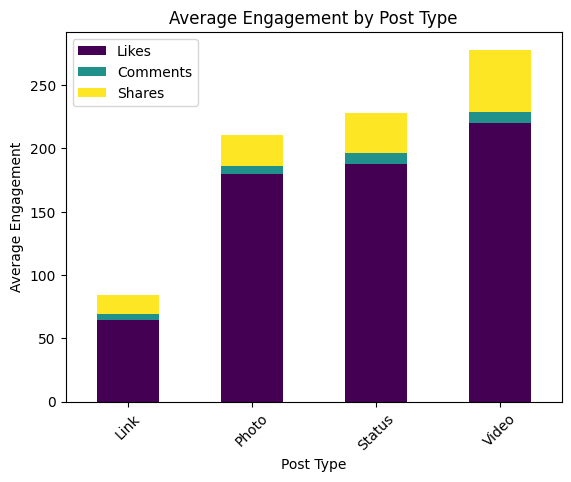

In [ ]:
#What Post Type Gets the Most Engagement?


import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv('/content/cleanedfbdata.csv')

# Group by post type and calculate average engagement (likes, comments, shares)
engagement_by_type = df.groupby('Type')[['like', 'comment', 'share']].mean()

# Plot the results
plt.figure(figsize=(8,5))
engagement_by_type.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Average Engagement by Post Type')
plt.xlabel('Post Type')
plt.ylabel('Average Engagement')
plt.legend(['Likes', 'Comments', 'Shares'])
plt.xticks(rotation=45)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_excel('/content/cleanedfbdata.xlsx')
# Define time of day categories
def categorize_time(hour):
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    else:
        return "Night"

# Apply categorization
df["Time of Day"] = df["Post Hour"].apply(categorize_time)

# Aggregate engagement metrics
engagement_by_time = df.groupby("Time of Day")["Total Interactions"].sum().reset_index() #means here we are grouping our data by time of the day and summing total interactions
#reset index - converting group data to daataframes
engagement_by_weekday = df.groupby("Post Weekday")["Total Interactions"].sum().reset_index()
engagement_by_post_type = df.groupby("Type")["Lifetime Post Total Reach"].sum().reset_index()

# Sort values for better visualization
engagement_by_time = engagement_by_time.sort_values(by="Total Interactions", ascending=False)
engagement_by_weekday = engagement_by_weekday.sort_values(by="Total Interactions", ascending=False)
engagement_by_post_type = engagement_by_post_type.sort_values(by="Lifetime Post Total Reach", ascending=False)

engagement_by_time, engagement_by_weekday, engagement_by_post_type


(  Time of Day  Total Interactions
 2       Night               23465
 1     Morning               21944
 0   Afternoon                1801,
    Post Weekday  Total Interactions
 3             4                8186
 1             2                7898
 6             7                6626
 2             3                6338
 0             1                6300
 5             6                6051
 4             5                5811,
      Type  Lifetime Post Total Reach
 1   Photo                    1656842
 2  Status                     414406
 3   Video                     197560
 0    Link                     134456)

In [ ]:
import pandas as pd

df = pd.read_excel("/content/cleanedfbdata.xlsx")

# mapping: Monday = 1, Tuesday = 2, ..., Sunday = 7
weekday_map = {
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday",
    7: "Sunday"
}

# Convert Post Weekday to numeric
df["Post Weekday"] = pd.to_numeric(df["Post Weekday"], errors='coerce').map(weekday_map)

'''
This ensures that the column values are treated as numbers.
If there are any non-numeric values eg empty strings
errors='coerce' converts them into null instead of causing an error.
'''

# Group by weekday and sum total interactions
engagement_by_weekday = df.groupby("Post Weekday")["Total Interactions"].sum().reset_index()



# Define the correct order for sorting
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Sort by weekday order
engagement_by_weekday["Post Weekday"] = pd.Categorical(engagement_by_weekday["Post Weekday"], categories=weekday_order, ordered=True)
'''
Converts the Post Weekday column into a categorical data type
This allows it to be explicitly ordered instead of being sorted alphabeticaly
'''

engagement_by_weekday = engagement_by_weekday.sort_values("Post Weekday").reset_index(drop=True)

'''
After sorting, the original index values may no longer be sequential.
reset_index(drop=True) removes the old index and assigns a new sequential index 0, 1, 2, .
drop=True ensures that the old index is discarded instead of being added as a new colum
'''

# Display the result
print(engagement_by_weekday)


  Post Weekday  Total Interactions
0       Monday                6300
1      Tuesday                7898
2    Wednesday                6338
3     Thursday                8186
4       Friday                5811
5     Saturday                6051
6       Sunday                6626


In [ ]:
import pandas as pd
from textblob import TextBlob

# Load the dataset
file_path = "/content/cleanedfbdata.xlsx"  # Update with the correct file path if needed
df = pd.read_excel(file_path)

# Function to classify sentiment using TextBlob
def get_sentiment(text):
    if isinstance(text, str):  # Ensure the text is a string
        polarity = TextBlob(text).sentiment.polarity  # Get polarity score
        if polarity > 0:
            return 'Positive'
        elif polarity < 0:
            return 'Negative'
        else:
            return 'Neutral'
    return 'Neutral'  # Default for missing or non-string values

# Apply sentiment analysis to the "Captions" column
df["Sentiment"] = df["Caption"].apply(get_sentiment)

# Display sentiment distribution
print(df["Sentiment"].value_counts())

# Save the updated dataframe with sentiment analysis
output_file = "/content/cleanedfbdata.xlsx"
df.to_excel(output_file, index=False)

print(f"Sentiment analysis completed. File saved at: {output_file}")


Sentiment
Positive    101
Neutral      69
Negative     56
Name: count, dtype: int64
Sentiment analysis completed. File saved at: /content/cleanedfbdata.xlsx


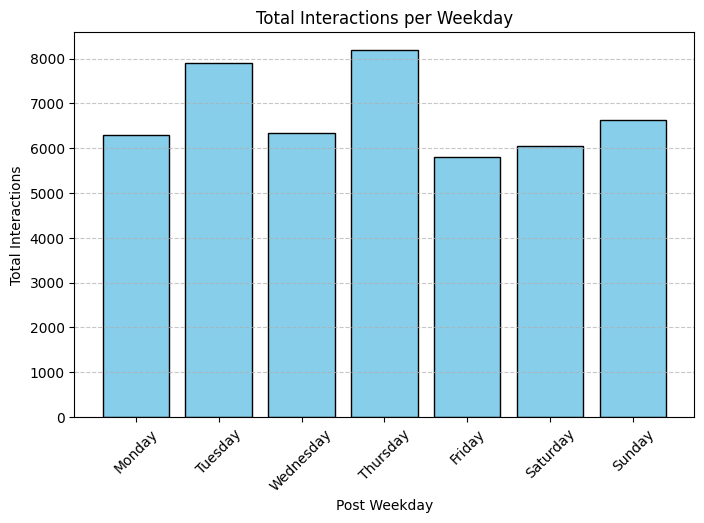

In [ ]:
import matplotlib.pyplot as plt

# Data
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
interactions = [6300, 7898, 6338, 8186, 5811, 6051, 6626]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(weekdays, interactions, color='skyblue', edgecolor='black')
plt.xlabel("Post Weekday")
plt.ylabel("Total Interactions")
plt.title("Total Interactions per Weekday")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


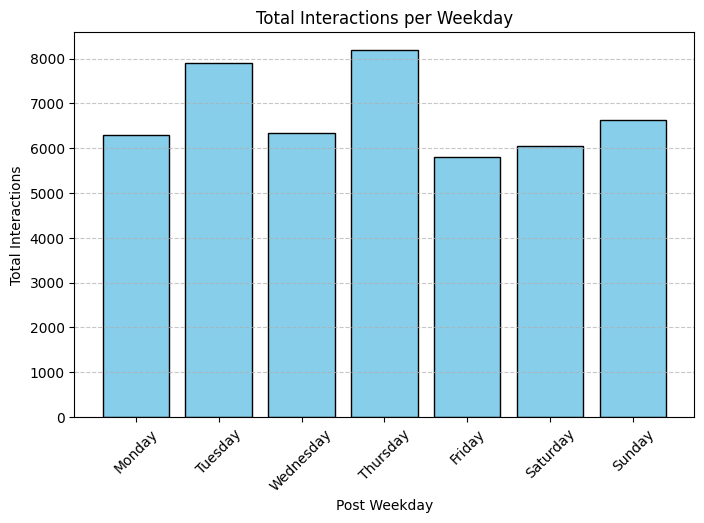

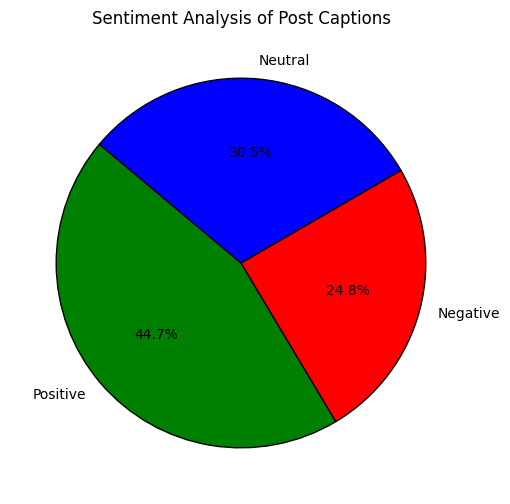

In [ ]:
import matplotlib.pyplot as plt

# Data for weekday interactions
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
interactions = [6300, 7898, 6338, 8186, 5811, 6051, 6626]

# Plot for weekday interactions
plt.figure(figsize=(8, 5))
plt.bar(weekdays, interactions, color='skyblue', edgecolor='black')
plt.xlabel("Post Weekday")
plt.ylabel("Total Interactions")
plt.title("Total Interactions per Weekday")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Data for sentiment analysis
total_posts = 226
labels = ["Positive", "Negative", "Neutral"]
values = [101, 56, 69]
colors = ['green', 'red', 'blue']

# Plot for sentiment analysis
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Sentiment Analysis of Post Captions")
plt.show()
